# Cadiocascular Death Regression Analysis

---

# Importing Data Dependables

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# To surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [140]:
# importing the datasets for the task

df = pd.read_csv(r"C:\Users\rave_consolidate\Desktop\cadiovascular_death\dataset\final_merge.csv")
df.head()

,Entity,Code,Year,tempchange,CO2,Deaths
0,Afghanistan,AFG,1990,0.000894,14209854.0,373.796590
1,Afghanistan,AFG,1991,0.000891,14436271.0,266.298725
2,Afghanistan,AFG,1992,0.000891,13517736.0,224.447196
3,Afghanistan,AFG,1993,0.000890,12913293.0,278.393699
4,Afghanistan,AFG,1994,0.000888,13214674.0,370.591181


# Data Preparation and Preprocessing

In [141]:
df_test = pd.read_csv(r"C:\Users\rave_consolidate\Desktop\cadiovascular_death\dataset\company_test_data.csv")
df_test.head()

,Company Name,Ticker,ISIN,GHG,Emissions,Predicted Value
0,Acciona,ANA,ES0125220311,CO2,306905.00,4.248217e-06
1,Acciona Energia,ANE,ES0105563003,CO2,55276.00,5.498951e-07
2,Acerinox,ACX,ES0132105018,CO2,4333367.00,5.412198e-05
3,Aena,AENA,ES0105046009,CO2,51516.69,1.100690e-06
4,Amadeus IT Group,AMS,ES0109067019,CO2,13152.00,2.369140e-07


In [142]:
# Trainset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      6144 non-null   object 
 1   Code        6144 non-null   object 
 2   Year        6144 non-null   int64  
 3   tempchange  6144 non-null   float64
 4   CO2         6144 non-null   float64
 5   Deaths      6144 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 288.1+ KB


In [143]:
# Testset info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     35 non-null     object 
 1   Ticker           35 non-null     object 
 2   ISIN             35 non-null     object 
 3   GHG              35 non-null     object 
 4   Emissions        35 non-null     float64
 5   Predicted Value  35 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.8+ KB


In [144]:
# checking the number of columns and rows for the trainset

print(f"The total number of rows is: {df.shape[0]}")
print(f"The total number of columns is: {df.shape[1]}")

# checking the number of columns and rows for the testset

print(f"The total number of rows is: {df_test.shape[0]}")
print(f"The total number of columns is: {df_test.shape[1]}")

The total number of rows is: 6144
The total number of columns is: 6
The total number of rows is: 35
The total number of columns is: 6


In [145]:
# checking for null values

df.isnull().sum()

Entity        0
Code          0
Year          0
tempchange    0
CO2           0
Deaths        0
dtype: int64

In [146]:
# Rename columns (Deaths to cardio_deaths and tempchange to temp_change)

df.columns = ['country', 'code', 'year', 'temp_change', 'CO2', 'cardio_deaths']

In [147]:
df.head()

,country,code,year,temp_change,CO2,cardio_deaths
0,Afghanistan,AFG,1990,0.000894,14209854.0,373.796590
1,Afghanistan,AFG,1991,0.000891,14436271.0,266.298725
2,Afghanistan,AFG,1992,0.000891,13517736.0,224.447196
3,Afghanistan,AFG,1993,0.000890,12913293.0,278.393699
4,Afghanistan,AFG,1994,0.000888,13214674.0,370.591181


In [148]:
# rename columns (emissions to CO2 and predicted values to temp_change)

df_test.columns = ['company_name', 'ticker', 'ISIN', 'GHG', 'CO2',
       'temp_change']
df_test.head()

,company_name,ticker,ISIN,GHG,CO2,temp_change
0,Acciona,ANA,ES0125220311,CO2,306905.00,4.248217e-06
1,Acciona Energia,ANE,ES0105563003,CO2,55276.00,5.498951e-07
2,Acerinox,ACX,ES0132105018,CO2,4333367.00,5.412198e-05
3,Aena,AENA,ES0105046009,CO2,51516.69,1.100690e-06
4,Amadeus IT Group,AMS,ES0109067019,CO2,13152.00,2.369140e-07


In [149]:
# fro the test data, Create the country, code, date 
df_test['country'] = 'Spain'
df_test['code'] = 'ESP'
df_test['year'] = 2022

In [150]:
df_test.head()

,company_name,ticker,ISIN,GHG,CO2,temp_change,country,code,year
0,Acciona,ANA,ES0125220311,CO2,306905.00,4.248217e-06,Spain,ESP,2022
1,Acciona Energia,ANE,ES0105563003,CO2,55276.00,5.498951e-07,Spain,ESP,2022
2,Acerinox,ACX,ES0132105018,CO2,4333367.00,5.412198e-05,Spain,ESP,2022
3,Aena,AENA,ES0105046009,CO2,51516.69,1.100690e-06,Spain,ESP,2022
4,Amadeus IT Group,AMS,ES0109067019,CO2,13152.00,2.369140e-07,Spain,ESP,2022


#### Dropping unwanted features from the data sets

- drop country since we already have country code as Code
- drop company_name, ticker, ISIN, GHG

In [151]:
# Drop the country column in the trainset (df)

df = df.drop("country", axis=1)

In [152]:
# Drop the company_name, ticker, ISIN, GHG for the testset

df_test = df_test.drop(["country","company_name", "ticker", "ISIN", "GHG"], axis=1)

In [153]:
df = df[["year", "code", "temp_change", "CO2", "cardio_deaths"]]
df_test = df_test[["year", "code", "temp_change", "CO2"]]

In [154]:
df.head()

,year,code,temp_change,CO2,cardio_deaths
0,1990,AFG,0.000894,14209854.0,373.796590
1,1991,AFG,0.000891,14436271.0,266.298725
2,1992,AFG,0.000891,13517736.0,224.447196
3,1993,AFG,0.000890,12913293.0,278.393699
4,1994,AFG,0.000888,13214674.0,370.591181


In [155]:
df_test.head()

,year,code,temp_change,CO2
0,2022,ESP,4.248217e-06,306905.00
1,2022,ESP,5.498951e-07,55276.00
2,2022,ESP,5.412198e-05,4333367.00
3,2022,ESP,1.100690e-06,51516.69
4,2022,ESP,2.369140e-07,13152.00


In [156]:
# checking for duplicates values
trainset_duplicate = df.duplicated().sum()
print(f"Total Number of Duplicates in trainset is: {trainset_duplicate}")

testset_duplicate = df_test.duplicated().sum()
print(f"Total Number of Duplicates in testset is: {testset_duplicate}")

Total Number of Duplicates in trainset is: 0
Total Number of Duplicates in testset is: 0


# Exploratory Data Analysis

#### Univariate Analysis

---

In [157]:
df.head()

,year,code,temp_change,CO2,cardio_deaths
0,1990,AFG,0.000894,14209854.0,373.796590
1,1991,AFG,0.000891,14436271.0,266.298725
2,1992,AFG,0.000891,13517736.0,224.447196
3,1993,AFG,0.000890,12913293.0,278.393699
4,1994,AFG,0.000888,13214674.0,370.591181


In [158]:
# Summary statistics

df.describe()

,year,temp_change,CO2,cardio_deaths
count,6144.000000,6.144000e+03,6.144000e+03,6144.000000
mean,2005.500000,6.596998e-03,2.368965e+08,702.342532
std,9.233844,2.211205e-02,8.653753e+08,4238.471687
min,1990.000000,2.270000e-07,-8.858048e+04,-3432.839427
25%,1997.750000,3.450455e-04,9.524310e+06,0.142907
50%,2005.500000,1.391079e-03,4.579474e+07,22.244704
75%,2013.250000,4.082338e-03,1.303098e+08,212.606476
max,2021.000000,2.800604e-01,1.377427e+10,95031.021970


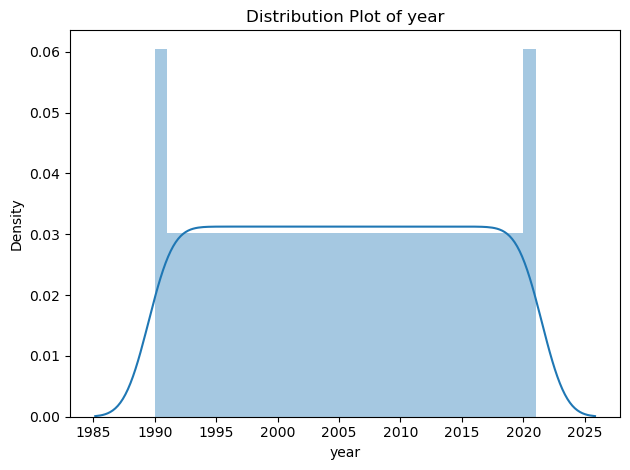

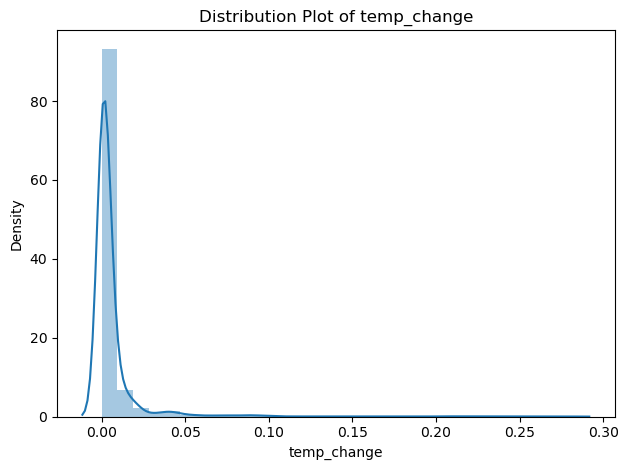

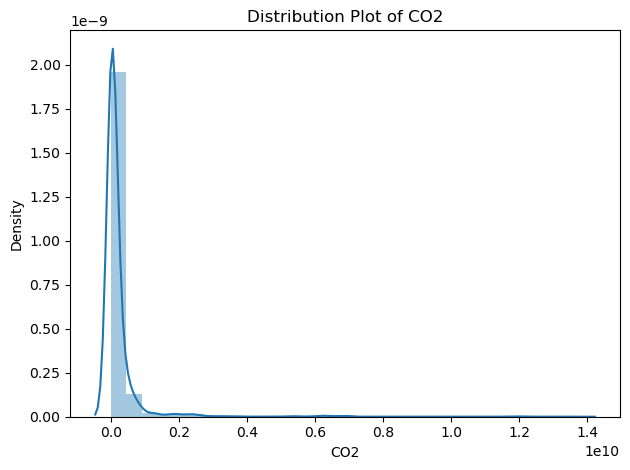

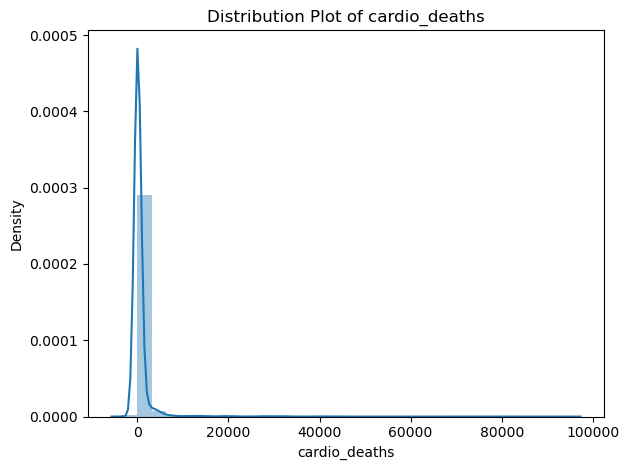

In [164]:
# Plot histograms for each numerical column
for col in df.select_dtypes(exclude="object"):
    # plt.figure(figsize=(12, 5))
    sns.distplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

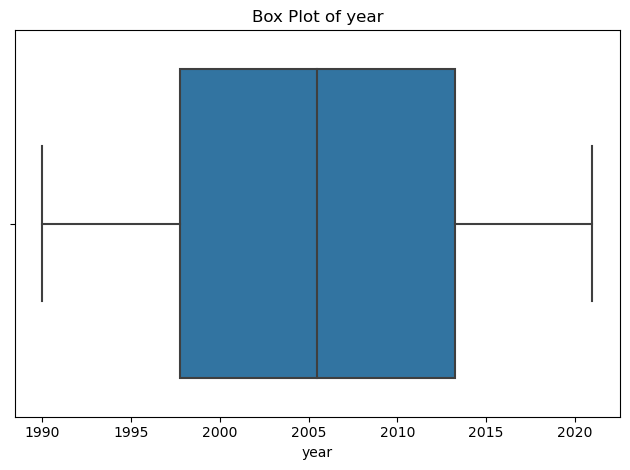

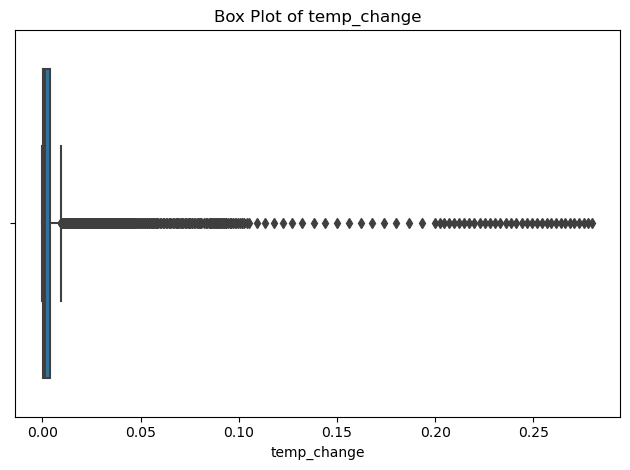

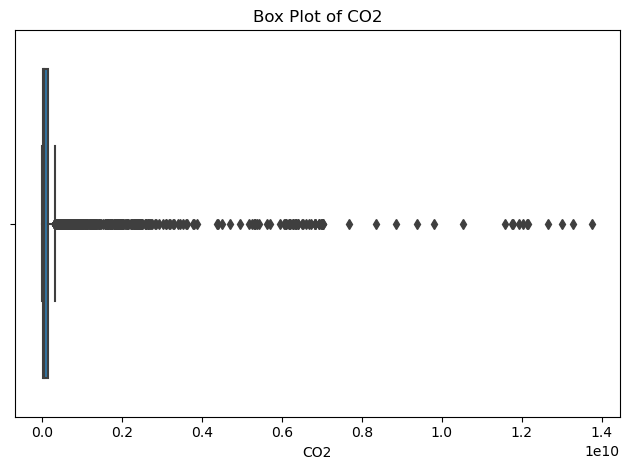

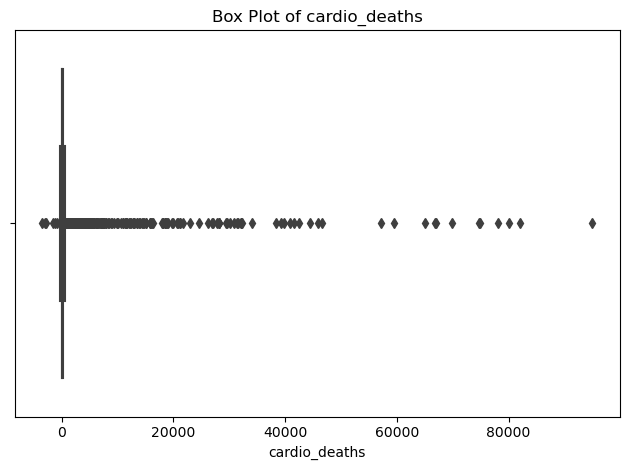

In [165]:
# for boxplot for each numerical column, run a for loop to plot box plot for each colum

for col in df.select_dtypes(exclude="object"):
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### Observations

1. **Year**
   - **Mean**: 2005.5
     - The average year in the dataset is 2005.5.
   - **Standard Deviation (std)**: 9.233844
     - There is a reasonable variation in the years, consistent with a 31-year range.
   - **Range**: 1990 to 2021
     - The data spans from 1990 to 2021.

2. **temp_change**
   - **Mean**: 0.006597
     - The average temperature change is 0.006597.
   - **Standard Deviation (std)**: 0.022112
     - Indicates a considerable variation in temperature change.
   - **Range**: 0.000000227 to 0.2800604
     - The smallest temperature change recorded is very close to zero, while the highest is 0.2800604.
   - **Quartiles**:
     - 25% of the records have a temperature change of 0.000345 or less.
     - The median temperature change is 0.001391.
     - 75% of the records have a temperature change of 0.004082 or less.
   - **Skewness**: The high standard deviation and the difference between the mean and the median suggest a right-skewed distribution with some large outliers.

3. **CO2**
   - **Mean**: 236,896,500
     - The average CO2 emission is 236,896,500 units.
   - **Standard Deviation (std)**: 865,375,300
     - Indicates a very high variation in CO2 emissions, suggesting the presence of outliers or a wide range.
   - **Range**: -88,580.48 to 13,774,270,000
     - There are negative values, which might indicate data entry errors or special cases that need investigation, and the maximum value is significantly higher.
   - **Quartiles**:
     - 25% of the records have CO2 emissions of 9,524,310 or less.
     - The median CO2 emission is 45,794,740.
     - 75% of the records have CO2 emissions of 130,309,800 or less.
   - **Skewness**: The very high standard deviation and range, along with the presence of negative values, suggest a need for data cleaning and handling of outliers.

4. **cardio_deaths**
   - **Mean**: 702.342532
     - The average number of cardiovascular deaths is 702.34.
   - **Standard Deviation (std)**: 4238.471687
     - Indicates a very high variation in cardiovascular deaths.
   - **Range**: -3432.839427 to 95,031.021970
     - The presence of negative values suggests possible data issues that need investigation.
   - **Quartiles**:
     - 25% of the records have cardiovascular deaths of 0.142907 or less.
     - The median number of cardiovascular deaths is 22.24.
     - 75% of the records have cardiovascular deaths of 212.61 or less.
   - **Skewness**: The high standard deviation and the difference between the mean and the median indicate the influence of large outliers and a highly skewed distribution.

In [166]:
# Create a Function to remove outliers based on Inter Quantile Range (IQR)

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df